<a href="https://colab.research.google.com/github/ManelSoengas/tutorials/blob/main/Deep_learning_CNN_2_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inroducción



Carga de librerias

In [1]:
!pip install tensorflow


In [2]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

import matplotlib.pyplot as plt

#from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.utils import np_utils

Carga del conjunto de datos

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualización de muestras del conjunto de datos

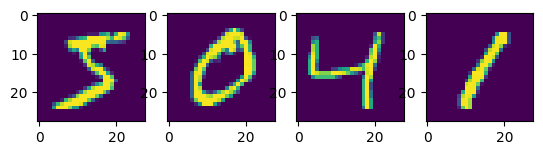

In [4]:
# plot 4 images as gray scale
plt.subplot(141)
plt.imshow(X_train[0])
plt.subplot(142)
plt.imshow(X_train[1])
plt.subplot(143)
plt.imshow(X_train[2])
plt.subplot(144)
plt.imshow(X_train[3])
plt.show()

Procesamiento de los datos

In [5]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [6]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Codificación de las etiquetas.

In [7]:
# one hot encode outputs
#y_train = np_utils.to_categorical(y_train)
#y_test = np_utils.to_categorical(y_test)
#num_classes = y_test.shape[1]

# Codificar las salidas en formato one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

Creación del modelo

In [8]:
# Create model
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compilar el modelo

In [9]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Entrenar el modelo

In [10]:
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8534 - loss: 0.5077 - val_accuracy: 0.9736 - val_loss: 0.0910
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9765 - loss: 0.0816 - val_accuracy: 0.9828 - val_loss: 0.0527
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9838 - loss: 0.0531 - val_accuracy: 0.9850 - val_loss: 0.0483
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9869 - loss: 0.0416 - val_accuracy: 0.9886 - val_loss: 0.0352
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9889 - val_loss: 0.0356
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9918 - loss: 0.0243 - val_accuracy: 0.9896 - val_loss: 0.0322
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.

In [11]:
# Acceder a la pérdida de entrenamiento y validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Si quieres la precisión, también puedes acceder así (si tu modelo tiene métricas de precisión configuradas)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


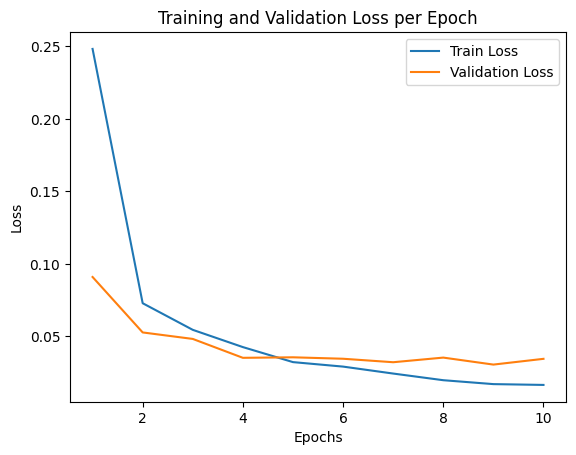

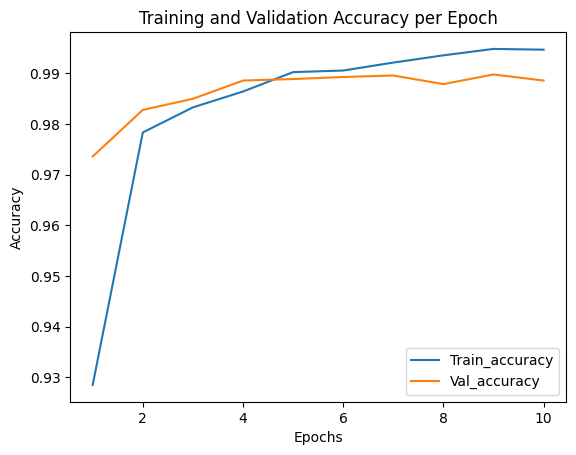

In [13]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.show()


plt.plot(epochs, train_accuracy, label='Train_accuracy')
plt.plot(epochs, val_accuracy, label='Val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Epoch")
plt.legend()
plt.show()

In [14]:
# Evaluación del modelo en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0431
Test Loss: 0.03453877940773964
Test Accuracy: 0.9886000156402588


Evaluar el modelo

In [ ]:
# Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.08%



Una inteface para cargar imégenes de números.
Explicar los pasos.